In [6]:
!pip install wordcloud textblob

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------------------------- ----- 542.7/626.3 kB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 9.9 MB/s eta 0:00:00


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [15]:
column_names= ['Index','Place','Sentiment','Tweet']
twitter_data = pd.read_csv(r"C:\Users\natal\Downloads\archive (1)\twitter_training.csv",names=column_names)
print(twitter_data.head())


   Index        Place Sentiment  \
0   2401  Borderlands  Positive   
1   2401  Borderlands  Positive   
2   2401  Borderlands  Positive   
3   2401  Borderlands  Positive   
4   2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [16]:
print(twitter_data.columns)

Index(['Index', 'Place', 'Sentiment', 'Tweet'], dtype='object')


In [17]:
print(twitter_data.isnull().sum())

Index          0
Place          0
Sentiment      0
Tweet        686
dtype: int64


In [21]:
if 'Tweet' in twitter_data.columns and 'Sentiment' in twitter_data.columns:
 sentiment_counts = twitter_data['Sentiment'].value_counts()
 print(sentiment_counts)


Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


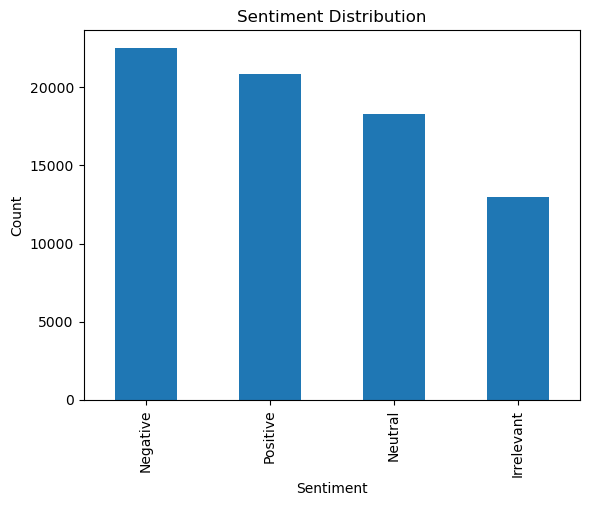

In [22]:
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


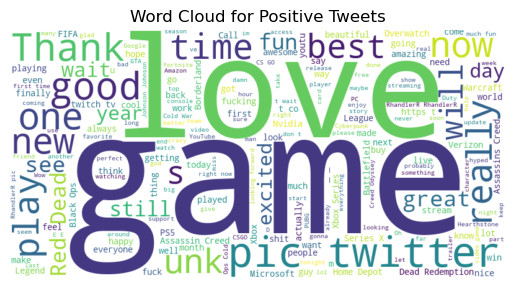

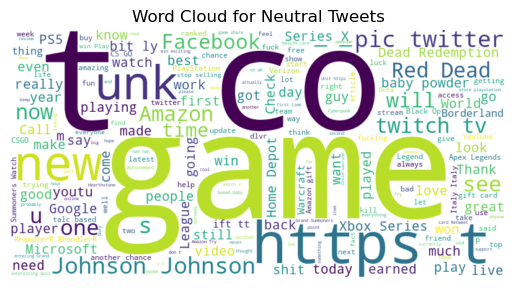

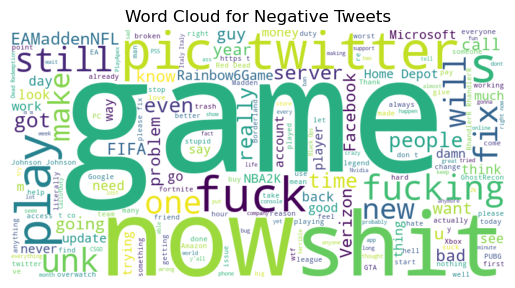

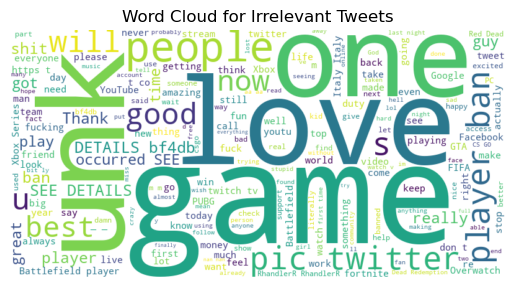

In [29]:
twitter_data['Tweet'] = twitter_data['Tweet'].astype(str).fillna('')
sentiments = twitter_data['Sentiment'].unique()
for Sentiment in sentiments:
    text = ' '.join(twitter_data[twitter_data['Sentiment'] == Sentiment]['Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {Sentiment.capitalize()} Tweets')
    plt.axis('off')
    plt.show()